In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
%matplotlib inline

In [2]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()


hi5


y=[1],es un 'cat' imagen.


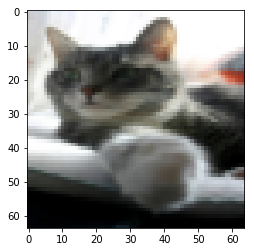

In [3]:
index = 188
example = train_set_x_orig[index]
plt.imshow(train_set_x_orig[index])
print ("y=" + str(train_set_y[:, index]) + ",es un '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' imagen.")

In [4]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[2]

print ("Numero de ejemplos de entrenamiento "+str(m_train))
print ("numero de ejemplo de prueba: " + str(m_test))
print ("altura de la imagen" + str(num_px))

Numero de ejemplos de entrenamiento 209
numero de ejemplo de prueba: 50
altura de la imagen64


In [5]:
# ejercicio 2


In [6]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

In [7]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [8]:
def initialize_with_zeros(dim):
    """
    Esta función crea un vector de ceros de forma (dim, 1) para w e inicializa b a 0.
    Entrada:
     dim - tamaño del vector w que queremos (o número de parámetros en este caso)
    
     Salida:
     w - vector de forma inicializado (dim, 1)
     b - escalar inicializado (corresponde al sesgo) """
    w = np.zeros(shape=(dim, 1), dtype=np.float32)
    b = 0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [9]:
def sigmoid(a):
    s = 1/(1+np.exp(-a))
    return s

In [10]:
sigmoid(np.array([0,2]))

array([0.5       , 0.88079708])

In [11]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    #FORDWARD PROPAGATION
    # (WTX+b)
    
    A = sigmoid(np.dot(w.T, X) + b)
    cost = (-1/m)*np.sum((Y*np.log(A)+ (1-Y)*np.log(1-A)), axis = 1)
    #BACKWARD PROPAGATION
    
    dw = (1/m)*np.dot(X,(A-Y).T)
    db = (1/m)*np.sum(A-Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    grads = {"dw": dw, "db": db}
    
    return grads, cost

In [12]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw= " + str(grads["dw"]))
print ("db= " + str(grads["db"]))
print ("cost= " + str(cost))

dw= [[0.99845601]
 [2.39507239]]
db= 0.001455578136784208
cost= 5.801545319394553


In [13]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w=w, b=b, X=X, Y=Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        
        w = w-learning_rate*dw
        b = b-learning_rate*db
        
    
        if i % 100 == 0:
            costs.append(cost)
        
        if print_cost and i % 100 == 0:
            
            print ("Cost after iteratin %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [14]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w: " + str(params["w"]))
print ("b:" + str(params["b"]))
print ("dw: " + str(grads["dw"]))
print ("db:" + str(grads["db"]))

w: [[0.19033591]
 [0.12259159]]
b:1.9253598300845747
dw: [[0.67752042]
 [1.41625495]]
db:0.21919450454067652


In [15]:
def predict(w, b, X):
    
    #Calcule el vector A que predice las probabilidades de que un gato esté presente en la imagen
    
    m = X.shape[1]
    
    Y_prediction = np.zeros((1,m))
    
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    
    [print(x) for x in A]
    for i in range(A.shape[1]):
        
        if A[0, i] >= 0.5:
            Y_prediction[0,i] = 1
            
        else:
            Y_prediction[0,i] = 0
        
        
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [16]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])

print("prediccion:" + str(predict(w, b, X)))

[0.52241976 0.50960677 0.34597965]
prediccion:[[1. 1. 0.]]


In [17]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost =
False):

    # Inicializa los parámetros con zeros

    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradiente descendiente
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # Obtener los parametros w and b de "parameters"
    w = parameters["w"]
    b = parameters["b"]
    # Realizar las predicción con los datos de entrenamiento y los datos de prueba)

    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    ### END CODE HERE ###
    # Imprimir el accuracy del modelo
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    d = {"costs": costs, "Y_prediction_test": Y_prediction_test,
    "Y_prediction_train" : Y_prediction_train, "w" : w, "b" : b,
    "learning_rate" : learning_rate, "num_iterations": num_iterations}

    return d

In [18]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005,
print_cost = True)

Cost after iteratin 0: 0.693147
Cost after iteratin 100: 0.584508
Cost after iteratin 200: 0.466949
Cost after iteratin 300: 0.376007
Cost after iteratin 400: 0.331463
Cost after iteratin 500: 0.303273
Cost after iteratin 600: 0.279880
Cost after iteratin 700: 0.260042
Cost after iteratin 800: 0.242941
Cost after iteratin 900: 0.228004
Cost after iteratin 1000: 0.214820
Cost after iteratin 1100: 0.203078
Cost after iteratin 1200: 0.192544
Cost after iteratin 1300: 0.183033
Cost after iteratin 1400: 0.174399
Cost after iteratin 1500: 0.166521
Cost after iteratin 1600: 0.159305
Cost after iteratin 1700: 0.152667
Cost after iteratin 1800: 0.146542
Cost after iteratin 1900: 0.140872
[0.94366988 0.86095311 0.88896715 0.93630641 0.74075403 0.52849619
 0.03094677 0.85707681 0.88457925 0.67279696 0.26601085 0.4823794
 0.74741157 0.78575729 0.00978911 0.9203284  0.02453695 0.84884703
 0.2050248  0.03703224 0.92931392 0.11930532 0.01411064 0.7832698
 0.58188015 0.66897565 0.75119007 0.01323558 0

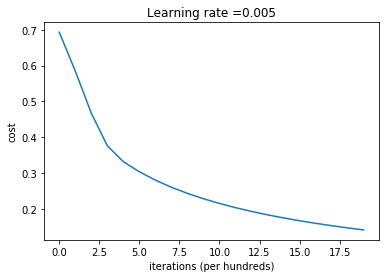

In [19]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
[0.97125943 0.9155338  0.92079132 0.96358044 0.78924234 0.60411297
 0.01179527 0.89814048 0.91522859 0.70264065 0.19380387 0.49537355
 0.7927164  0.85423431 0.00298587 0.96199699 0.01234735 0.9107653
 0.13661137 0.01424336 0.96894735 0.1033746  0.00579297 0.86081326
 0.53811196 0.64950178 0.83272843 0.00426307 0.0131452  0.99947804
 0.11468372 0.82182442 0.69611733 0.4991522  0.67231401 0.01728165
 0.04136099 0.80069693 0.26832359 0.03958566 0.74731239 0.32116434
 0.71871197 0.01205725 0.96879962 0.62310364 0.17737126 0.98960523
 0.74697265 0.07284605]
[1.47839654e-01 5.78008188e-02 9.42385025e-01 4.14849241e-05
 2.27209941e-02 7.29254668e-02 2.23704495e-02 9.49717864e-01
 5.41724296e-02 2.92729895e-02 6.82412299e-02 8.33370210e-01
 1.71420615e-01 9.66879883e-01 8.11537151e-01 2.44343484e-02
 7.87634097e-03 2.64027272e-02 5.60720049e-02 9.53130353e-01
 5.30865325e-03 3.11020746e-02 1.43606493e-01 1.92650473e-02
 9.30132798e-01 8.95291211e-01 2.72790550e-02 9.0148

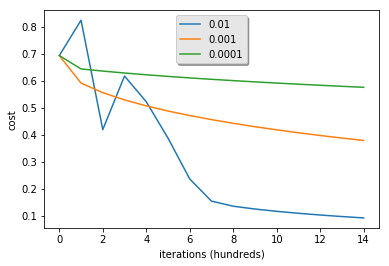

In [20]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500,
learning_rate = i, print_cost = False)
print ('\n' + "-------------------------------------------------------" + '\n')
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))
plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

learning rate is: 0.01
[0.97125943 0.9155338  0.92079132 0.96358044 0.78924234 0.60411297
 0.01179527 0.89814048 0.91522859 0.70264065 0.19380387 0.49537355
 0.7927164  0.85423431 0.00298587 0.96199699 0.01234735 0.9107653
 0.13661137 0.01424336 0.96894735 0.1033746  0.00579297 0.86081326
 0.53811196 0.64950178 0.83272843 0.00426307 0.0131452  0.99947804
 0.11468372 0.82182442 0.69611733 0.4991522  0.67231401 0.01728165
 0.04136099 0.80069693 0.26832359 0.03958566 0.74731239 0.32116434
 0.71871197 0.01205725 0.96879962 0.62310364 0.17737126 0.98960523
 0.74697265 0.07284605]
[1.47839654e-01 5.78008188e-02 9.42385025e-01 4.14849241e-05
 2.27209941e-02 7.29254668e-02 2.23704495e-02 9.49717864e-01
 5.41724296e-02 2.92729895e-02 6.82412299e-02 8.33370210e-01
 1.71420615e-01 9.66879883e-01 8.11537151e-01 2.44343484e-02
 7.87634097e-03 2.64027272e-02 5.60720049e-02 9.53130353e-01
 5.30865325e-03 3.11020746e-02 1.43606493e-01 1.92650473e-02
 9.30132798e-01 8.95291211e-01 2.72790550e-02 9.0148

C:\Users\JoseV\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
C:\Users\JoseV\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  


[9.99999999e-01 9.99955642e-01 9.99992578e-01 9.99999999e-01
 9.99429632e-01 9.95330877e-01 1.54810355e-13 9.99999328e-01
 9.99999936e-01 9.95698849e-01 5.67329826e-05 9.00560700e-01
 9.99969818e-01 9.46167635e-01 6.76853572e-19 1.00000000e+00
 2.44163155e-12 9.99999911e-01 1.67079257e-04 1.57221326e-11
 9.99999879e-01 1.42385598e-11 1.54228252e-14 9.92274805e-01
 8.02984428e-01 5.05918682e-01 9.99923770e-01 9.86847255e-17
 8.43560768e-16 1.00000000e+00 1.93720997e-07 4.49581853e-01
 9.99781514e-01 1.76025101e-02 9.97037647e-01 1.50869942e-11
 1.63196316e-09 9.99701195e-01 1.34529765e-05 2.44612150e-08
 9.98592638e-01 2.26353293e-05 9.98823095e-01 3.53495403e-10
 1.00000000e+00 9.48836764e-01 3.70016706e-05 1.00000000e+00
 9.99255830e-01 8.80640624e-09]
[1.97570317e-03 5.93449656e-11 9.99994114e-01 7.97726625e-27
 1.71074484e-09 2.52294124e-06 2.00345440e-10 1.00000000e+00
 4.39029878e-11 1.21658444e-13 6.53558784e-06 9.94948064e-01
 2.19434515e-05 1.00000000e+00 9.95952362e-01 4.11844

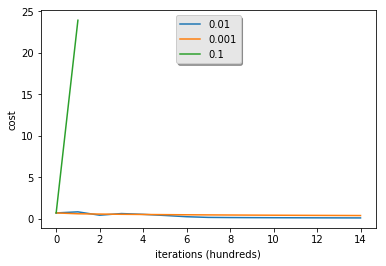

In [21]:
learning_rates = [0.01, 0.001, 0.1]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500,
learning_rate = i, print_cost = False)
print ('\n' + "-------------------------------------------------------" + '\n')
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))
plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [23]:
## START CODE HERE ## (PUT YOUR IMAGE NAME)
my_image = "gato3.jpg" # cambia el nombre de tu imagen
## END CODE HERE ##
# Procesamos las imágenes que se ajusten a nuestro modelo
fname = "pruebaimagenes/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))

my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T

my_predicted_image = predict(d["w"], d["b"], my_image)
plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" +
classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") + "\" picture.")## START CODE HERE ## (PUT YOUR IMAGE NAME)
my_image = "imagato.jpg" # cambia el nombre de tu imagen
## END CODE HERE ##
# Procesamos las imágenes que se ajusten a nuestro modelo
fname = "gatos/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))

my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T

my_predicted_image = predict(d["w"], d["b"], my_image)
plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" +
classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") + "\" picture.")

C:\Users\JoseV\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


FileNotFoundError: [Errno 2] No such file or directory: 'pruebaimagenes/gato3.jpg'

C:\Users\JoseV\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
C:\Users\JoseV\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


[1.]
y = 1.0, your algorithm predicts a "cat" picture.


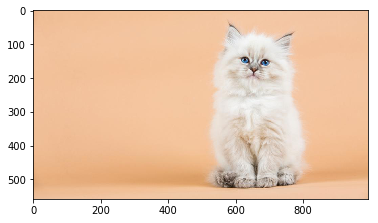

In [24]:
## START CODE HERE ## (PUT YOUR IMAGE NAME)
my_image = "imagato.jpg" # cambia el nombre de tu imagen
## END CODE HERE ##
# Procesamos las imágenes que se ajusten a nuestro modelo
fname = "gato/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))

my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T

my_predicted_image = predict(d["w"], d["b"], my_image)
plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" +
classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") + "\" picture.")